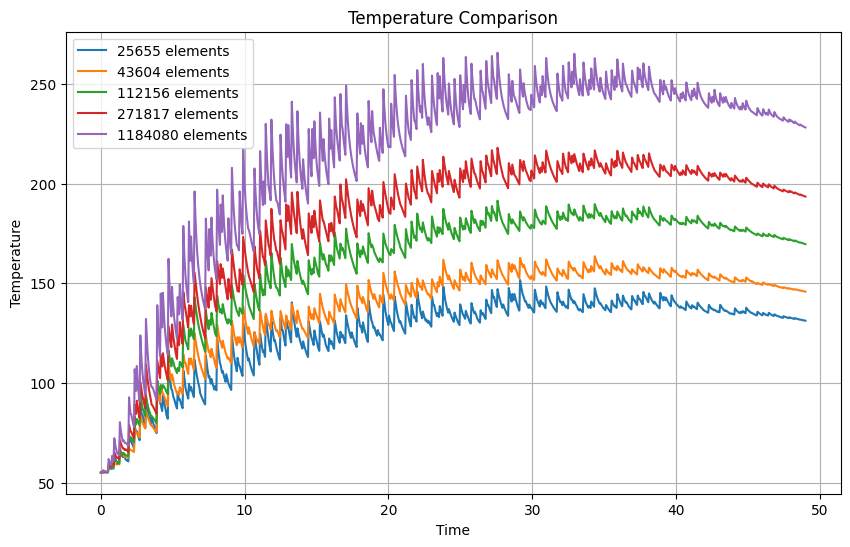

In [8]:
import os
import shutil
import pandas as pd
import re
import matplotlib.pyplot as plt

# Source and destination directories
source_dir = '/home/yanjun/Documents/FEM_results/mesh-sensitivity'
destination_dir = '/home/yanjun/Documents/FEniCSx/Projecct/Data/mesh_sensitivity'

# Function to collect CSV files recursively
def collect_csv_files(directory):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
    return csv_files

def extract_elements(file_name):
    match = re.search(r'e-(\d+)', file_name)
    if match:
        return int(match.group(1))
    return 0

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(destination_dir)

# Sort CSV files based on the number of elements
csv_files.sort(key=lambda x: extract_elements(x))

# Plotting
plt.figure(figsize=(10, 6))
for csv_file in csv_files:
    # Read CSV file
    df = pd.read_csv(csv_file)
    
    # Extract data
    time_data = df.iloc[:, 1]  # Assuming time is in the second column (index 1)
    temperature_data = df.iloc[:, 2]  # Assuming temperature is in the third column (index 2)
    
    # Extract label from file name
    file_name = os.path.basename(csv_file)
    elements = extract_elements(file_name)
    label = f"{elements} elements"
    
    # Plot data
    plt.plot(time_data, temperature_data, label=label)

plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Temperature Comparison')
plt.legend()
plt.grid(True)
plt.savefig('temperature_comparison.png')
plt.show()